In [ ]:
import cvxpy as cp
import numpy as np

In [ ]:
param_tuning=[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]

In [ ]:
param_tuning

[1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0,
 1000000000.0]

In [ ]:
import pandas as pd
Matrix_WE=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [ ]:
Matrix_WE = Matrix_WE.rename(index={idx: name for idx, name in zip(Matrix_WE.index,Matrix_WE.iloc[:,0])})

In [ ]:
Matrix_WE=Matrix_WE.iloc[:,1:73]

In [ ]:
Matrix_WE

,SA594315,SA594666,SA594675,SA594687,SA594695,SA594712,SA594737,SA594762,SA594772,SA594784,...,SA595220,SA595225,SA595995,SA596016,SA596027,SA596039,SA596051,SA596068,SA596093,SA596106
A[C>A]A,2,1,2,0,0,0,1,1,3,0,...,2,1,2,4,0,7,4,1,0,0
A[C>A]C,0,4,1,1,1,1,1,0,3,0,...,3,0,2,1,1,2,0,0,2,1
A[C>A]G,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
A[C>A]T,0,2,0,0,0,0,0,1,1,0,...,0,0,4,0,0,1,2,1,0,1
A[C>G]A,2,6,0,1,1,0,0,0,1,1,...,2,2,1,0,0,3,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,1,0,1,0,0,2,2,2,0,0,...,0,0,1,2,0,1,3,1,1,1
T[T>G]A,1,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
T[T>G]C,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,0,0
T[T>G]G,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,2,0,2,0


In [ ]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WE.sum()
sum_columns

SA594315    233
SA594666    902
SA594675     67
SA594687     30
SA594695     53
           ... 
SA596039    373
SA596051    247
SA596068    765
SA596093     84
SA596106     76
Length: 72, dtype: int64

In [ ]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WE= Matrix_WE.divide(sum_columns)

In [ ]:
Matrix_WE

,SA594315,SA594666,SA594675,SA594687,SA594695,SA594712,SA594737,SA594762,SA594772,SA594784,...,SA595220,SA595225,SA595995,SA596016,SA596027,SA596039,SA596051,SA596068,SA596093,SA596106
A[C>A]A,0.008584,0.001109,0.029851,0.000000,0.000000,0.000000,0.016949,0.013333,0.019231,0.000000,...,0.017544,0.014286,0.021978,0.023392,0.000000,0.018767,0.016194,0.001307,0.000000,0.000000
A[C>A]C,0.000000,0.004435,0.014925,0.033333,0.018868,0.008772,0.016949,0.000000,0.019231,0.000000,...,0.026316,0.000000,0.021978,0.005848,0.007143,0.005362,0.000000,0.000000,0.023810,0.013158
A[C>A]G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006410,0.003968,...,0.000000,0.000000,0.000000,0.005848,0.000000,0.002681,0.000000,0.000000,0.000000,0.000000
A[C>A]T,0.000000,0.002217,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.006410,0.000000,...,0.000000,0.000000,0.043956,0.000000,0.000000,0.002681,0.008097,0.001307,0.000000,0.013158
A[C>G]A,0.008584,0.006652,0.000000,0.033333,0.018868,0.000000,0.000000,0.000000,0.006410,0.003968,...,0.017544,0.028571,0.010989,0.000000,0.000000,0.008043,0.004049,0.002614,0.023810,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,0.004292,0.000000,0.014925,0.000000,0.000000,0.017544,0.033898,0.026667,0.000000,0.000000,...,0.000000,0.000000,0.010989,0.011696,0.000000,0.002681,0.012146,0.001307,0.011905,0.013158
T[T>G]A,0.004292,0.002217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010989,0.000000,0.000000,0.002681,0.000000,0.001307,0.011905,0.000000
T[T>G]C,0.000000,0.001109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.012146,0.000000,0.000000,0.000000
T[T>G]G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006410,0.000000,...,0.000000,0.000000,0.000000,0.005848,0.000000,0.002681,0.008097,0.000000,0.023810,0.000000


In [ ]:
COSMIC_SIGNATURE=pd.read_csv('/content/COSMIC_SIGNATURE.txt',sep='\t')

In [ ]:
COSMIC_SIGNATURE

,Type,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,...,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94,SBS95
0,A[C>A]A,8.861572e-04,5.800168e-07,0.020808,0.042196,0.011998,0.000425,6.704351e-05,0.002329,0.004830,...,0.002954,0.008973,1.000000e-18,0.032169,0.002202,0.002945,0.011329,0.011573,0.015580,0.038408
1,A[C>A]C,2.280405e-03,1.480043e-04,0.016507,0.033297,0.009438,0.000524,1.791162e-04,0.000461,0.001150,...,0.003775,0.004573,1.000000e-18,0.017694,0.000708,0.052997,0.009745,0.008096,0.024746,0.017384
2,A[C>A]G,1.770314e-04,5.230151e-05,0.001751,0.015599,0.001850,0.000052,7.124623e-05,0.000186,0.000377,...,0.000385,0.006209,1.000000e-18,0.009671,0.000139,0.000204,0.004697,0.001761,0.001574,0.008360
3,A[C>A]T,1.280227e-03,9.780282e-05,0.012205,0.029498,0.006609,0.000180,2.481610e-04,0.000710,0.001960,...,0.003624,0.004957,1.731102e-03,0.020744,0.001755,0.000131,0.007758,0.008421,0.011076,0.023294
4,A[C>G]A,1.860330e-03,2.230064e-16,0.019708,0.006889,0.010098,0.000471,6.494214e-05,0.000009,0.001120,...,0.052516,0.007866,1.000000e-18,0.014817,0.000508,0.000243,0.003056,0.008857,0.007004,0.003617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,T[T>C]T,4.330768e-03,3.580103e-05,0.013906,0.000636,0.018496,0.001741,8.125273e-04,0.002969,0.088107,...,0.003439,0.006588,9.636469e-02,0.006790,0.004000,0.001274,0.014287,0.014080,0.016766,0.005698
92,T[T>G]A,2.230396e-16,1.670048e-05,0.007253,0.000377,0.005219,0.000105,1.280831e-04,0.000955,0.019302,...,0.007136,0.008204,3.058280e-02,0.006866,0.018583,0.005955,0.002208,0.053674,0.004072,0.000004
93,T[T>G]C,5.510978e-05,7.040203e-05,0.006283,0.000174,0.006559,0.000287,1.160753e-04,0.001550,0.017401,...,0.002369,0.002497,2.077323e-02,0.002929,0.000185,0.000143,0.000301,0.013276,0.001235,0.000421
94,T[T>G]G,5.831035e-04,9.540276e-05,0.008053,0.002320,0.006939,0.000324,2.231448e-16,0.001350,0.007641,...,0.002011,0.001996,1.000000e-18,0.005037,0.000293,0.000628,0.001743,0.012705,0.003048,0.000464


In [ ]:
COSMIC_SIGNATURE = COSMIC_SIGNATURE.rename(index={idx: name for idx, name in zip(COSMIC_SIGNATURE.index,COSMIC_SIGNATURE.iloc[:,0])})

In [ ]:
COSMIC_SIGNATURE=COSMIC_SIGNATURE.iloc[:,1:80]

In [ ]:
COSMIC_SIGNATURE

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94,SBS95
A[C>A]A,8.861572e-04,5.800168e-07,0.020808,0.042196,0.011998,0.000425,6.704351e-05,0.002329,0.004830,0.000040,...,0.002954,0.008973,1.000000e-18,0.032169,0.002202,0.002945,0.011329,0.011573,0.015580,0.038408
A[C>A]C,2.280405e-03,1.480043e-04,0.016507,0.033297,0.009438,0.000524,1.791162e-04,0.000461,0.001150,0.000765,...,0.003775,0.004573,1.000000e-18,0.017694,0.000708,0.052997,0.009745,0.008096,0.024746,0.017384
A[C>A]G,1.770314e-04,5.230151e-05,0.001751,0.015599,0.001850,0.000052,7.124623e-05,0.000186,0.000377,0.000250,...,0.000385,0.006209,1.000000e-18,0.009671,0.000139,0.000204,0.004697,0.001761,0.001574,0.008360
A[C>A]T,1.280227e-03,9.780282e-05,0.012205,0.029498,0.006609,0.000180,2.481610e-04,0.000710,0.001960,0.004049,...,0.003624,0.004957,1.731102e-03,0.020744,0.001755,0.000131,0.007758,0.008421,0.011076,0.023294
A[C>G]A,1.860330e-03,2.230064e-16,0.019708,0.006889,0.010098,0.000471,6.494214e-05,0.000009,0.001120,0.001180,...,0.052516,0.007866,1.000000e-18,0.014817,0.000508,0.000243,0.003056,0.008857,0.007004,0.003617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,4.330768e-03,3.580103e-05,0.013906,0.000636,0.018496,0.001741,8.125273e-04,0.002969,0.088107,0.043093,...,0.003439,0.006588,9.636469e-02,0.006790,0.004000,0.001274,0.014287,0.014080,0.016766,0.005698
T[T>G]A,2.230396e-16,1.670048e-05,0.007253,0.000377,0.005219,0.000105,1.280831e-04,0.000955,0.019302,0.000211,...,0.007136,0.008204,3.058280e-02,0.006866,0.018583,0.005955,0.002208,0.053674,0.004072,0.000004
T[T>G]C,5.510978e-05,7.040203e-05,0.006283,0.000174,0.006559,0.000287,1.160753e-04,0.001550,0.017401,0.000115,...,0.002369,0.002497,2.077323e-02,0.002929,0.000185,0.000143,0.000301,0.013276,0.001235,0.000421
T[T>G]G,5.831035e-04,9.540276e-05,0.008053,0.002320,0.006939,0.000324,2.231448e-16,0.001350,0.007641,0.000125,...,0.002011,0.001996,1.000000e-18,0.005037,0.000293,0.000628,0.001743,0.012705,0.003048,0.000464


In [ ]:
COSMIC_SIGNATURE.sum()

SBS1     1.0
SBS2     1.0
SBS3     1.0
SBS4     1.0
SBS5     1.0
        ... 
SBS91    1.0
SBS92    1.0
SBS93    1.0
SBS94    1.0
SBS95    1.0
Length: 79, dtype: float64

In [ ]:
n, m = 79, 72
X = COSMIC_SIGNATURE.values
Y = Matrix_WE.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]


error=[]
# (minimizzazione degli scarti quadratici)
for i in range(len(param_tuning)-2):
  objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+ param_tuning[i] * cp.norm(w, 1))
  problem = cp.Problem(objective, constraints)
  problem.solve()
  coefficients_WE = w.value
  error.append(np.linalg.norm(Y - X @ coefficients_WE,'fro'))


In [ ]:
error

[0.6325840779840424,
 0.6325840779863426,
 0.6325840779839782,
 0.6325840779875419,
 0.6325840779884101,
 0.6325840779791487,
 0.6325840779859109,
 0.6325840779794105,
 0.6325840779792075,
 0.6325840779803201,
 0.6325840783022492,
 0.6325841117951055,
 0.6325865851853014,
 0.6325862419165531,
 0.6325906814619787,
 0.6325928578201325,
 0.6325889368795514]

In [ ]:
param_tuning[1:18]

[1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0]

([<matplotlib.axis.YTick at 0x78bb21ac0520>,
 [Text(0, 0.6325840779840424, '84.078'),
  Text(0, 0.6325840779863426, '84.078'),
  Text(0, 0.6325840779839782, '84.078'),
  Text(0, 0.6325840779875419, '84.078'),
  Text(0, 0.6325840779884101, '84.078'),
  Text(0, 0.6325840779791487, '84.078'),
  Text(0, 0.6325840779859109, '84.078'),
  Text(0, 0.6325840779794105, '84.078'),
  Text(0, 0.6325840779792075, '84.078'),
  Text(0, 0.6325840779803201, '84.078'),
  Text(0, 0.6325840783022492, '84.078'),
  Text(0, 0.6325841117951055, '84.112'),
  Text(0, 0.6325865851853014, '86.585'),
  Text(0, 0.6325862419165531, '86.242'),
  Text(0, 0.6325906814619787, '90.681'),
  Text(0, 0.6325928578201325, '92.858'),
  Text(0, 0.6325889368795514, '88.937')])

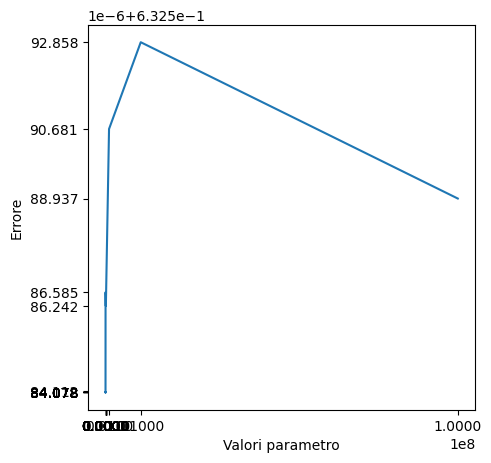

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(param_tuning[1:18],error)
plt.xlabel('Valori parametro')
plt.ylabel('Errore')

plt.xticks(param_tuning[1:18])
plt.yticks(error)

In [ ]:
import pandas as pd

Matrix_WG=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [ ]:
Matrix_WG = Matrix_WG.rename(index={idx: name for idx, name in zip(Matrix_WG.index,Matrix_WG.iloc[:,0])})

In [ ]:
Matrix_WG=Matrix_WG.iloc[:,1:73]

In [ ]:
Matrix_WG

,SA594315,SA594666,SA594675,SA594687,SA594695,SA594712,SA594737,SA594762,SA594772,SA594784,...,SA595220,SA595225,SA595995,SA596016,SA596027,SA596039,SA596051,SA596068,SA596093,SA596106
A[C>A]A,12,11,12,4,7,14,11,12,28,4,...,18,12,12,24,7,36,32,19,15,11
A[C>A]C,13,18,7,7,8,3,6,0,23,6,...,18,6,17,17,7,32,27,18,8,12
A[C>A]G,3,2,2,2,1,3,2,3,6,2,...,0,3,4,3,0,8,13,3,3,3
A[C>A]T,7,11,6,3,1,14,4,5,19,2,...,14,9,6,10,4,17,27,16,9,5
A[C>G]A,9,51,9,6,2,3,4,5,11,10,...,8,9,7,8,6,20,19,22,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,7,21,4,4,11,13,9,5,9,4,...,6,6,13,11,5,20,39,22,12,10
T[T>G]A,4,12,4,0,4,3,5,3,8,1,...,6,2,4,5,4,10,23,5,3,2
T[T>G]C,2,8,1,3,0,6,3,2,2,1,...,3,3,1,0,3,8,17,3,4,2
T[T>G]G,19,9,5,2,3,5,2,1,3,2,...,3,2,1,3,1,7,19,6,4,7


In [ ]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WG.sum()
sum_columns

SA594315    2170
SA594666    9286
SA594675     694
SA594687     398
SA594695     659
            ... 
SA596039    3645
SA596051    2640
SA596068    7275
SA596093     891
SA596106     731
Length: 72, dtype: int64

In [ ]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WG= Matrix_WG.divide(sum_columns)

In [ ]:
Matrix_WG

,SA594315,SA594666,SA594675,SA594687,SA594695,SA594712,SA594737,SA594762,SA594772,SA594784,...,SA595220,SA595225,SA595995,SA596016,SA596027,SA596039,SA596051,SA596068,SA596093,SA596106
A[C>A]A,0.005530,0.001185,0.017291,0.010050,0.010622,0.012670,0.014436,0.014269,0.016959,0.001395,...,0.014481,0.019324,0.014670,0.017094,0.005279,0.009877,0.012121,0.002612,0.016835,0.015048
A[C>A]C,0.005991,0.001938,0.010086,0.017588,0.012140,0.002715,0.007874,0.000000,0.013931,0.002092,...,0.014481,0.009662,0.020782,0.012108,0.005279,0.008779,0.010227,0.002474,0.008979,0.016416
A[C>A]G,0.001382,0.000215,0.002882,0.005025,0.001517,0.002715,0.002625,0.003567,0.003634,0.000697,...,0.000000,0.004831,0.004890,0.002137,0.000000,0.002195,0.004924,0.000412,0.003367,0.004104
A[C>A]T,0.003226,0.001185,0.008646,0.007538,0.001517,0.012670,0.005249,0.005945,0.011508,0.000697,...,0.011263,0.014493,0.007335,0.007123,0.003017,0.004664,0.010227,0.002199,0.010101,0.006840
A[C>G]A,0.004147,0.005492,0.012968,0.015075,0.003035,0.002715,0.005249,0.005945,0.006663,0.003487,...,0.006436,0.014493,0.008557,0.005698,0.004525,0.005487,0.007197,0.003024,0.010101,0.004104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,0.003226,0.002261,0.005764,0.010050,0.016692,0.011765,0.011811,0.005945,0.005451,0.001395,...,0.004827,0.009662,0.015892,0.007835,0.003771,0.005487,0.014773,0.003024,0.013468,0.013680
T[T>G]A,0.001843,0.001292,0.005764,0.000000,0.006070,0.002715,0.006562,0.003567,0.004846,0.000349,...,0.004827,0.003221,0.004890,0.003561,0.003017,0.002743,0.008712,0.000687,0.003367,0.002736
T[T>G]C,0.000922,0.000862,0.001441,0.007538,0.000000,0.005430,0.003937,0.002378,0.001211,0.000349,...,0.002414,0.004831,0.001222,0.000000,0.002262,0.002195,0.006439,0.000412,0.004489,0.002736
T[T>G]G,0.008756,0.000969,0.007205,0.005025,0.004552,0.004525,0.002625,0.001189,0.001817,0.000697,...,0.002414,0.003221,0.001222,0.002137,0.000754,0.001920,0.007197,0.000825,0.004489,0.009576


In [ ]:
COSMIC_SIGNATURE=pd.read_csv('/content/COSMIC_SIGNATURE.txt',sep='\t')

In [ ]:
COSMIC_SIGNATURE

,Type,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,...,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94,SBS95
0,A[C>A]A,8.861572e-04,5.800168e-07,0.020808,0.042196,0.011998,0.000425,6.704351e-05,0.002329,0.004830,...,0.002954,0.008973,1.000000e-18,0.032169,0.002202,0.002945,0.011329,0.011573,0.015580,0.038408
1,A[C>A]C,2.280405e-03,1.480043e-04,0.016507,0.033297,0.009438,0.000524,1.791162e-04,0.000461,0.001150,...,0.003775,0.004573,1.000000e-18,0.017694,0.000708,0.052997,0.009745,0.008096,0.024746,0.017384
2,A[C>A]G,1.770314e-04,5.230151e-05,0.001751,0.015599,0.001850,0.000052,7.124623e-05,0.000186,0.000377,...,0.000385,0.006209,1.000000e-18,0.009671,0.000139,0.000204,0.004697,0.001761,0.001574,0.008360
3,A[C>A]T,1.280227e-03,9.780282e-05,0.012205,0.029498,0.006609,0.000180,2.481610e-04,0.000710,0.001960,...,0.003624,0.004957,1.731102e-03,0.020744,0.001755,0.000131,0.007758,0.008421,0.011076,0.023294
4,A[C>G]A,1.860330e-03,2.230064e-16,0.019708,0.006889,0.010098,0.000471,6.494214e-05,0.000009,0.001120,...,0.052516,0.007866,1.000000e-18,0.014817,0.000508,0.000243,0.003056,0.008857,0.007004,0.003617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,T[T>C]T,4.330768e-03,3.580103e-05,0.013906,0.000636,0.018496,0.001741,8.125273e-04,0.002969,0.088107,...,0.003439,0.006588,9.636469e-02,0.006790,0.004000,0.001274,0.014287,0.014080,0.016766,0.005698
92,T[T>G]A,2.230396e-16,1.670048e-05,0.007253,0.000377,0.005219,0.000105,1.280831e-04,0.000955,0.019302,...,0.007136,0.008204,3.058280e-02,0.006866,0.018583,0.005955,0.002208,0.053674,0.004072,0.000004
93,T[T>G]C,5.510978e-05,7.040203e-05,0.006283,0.000174,0.006559,0.000287,1.160753e-04,0.001550,0.017401,...,0.002369,0.002497,2.077323e-02,0.002929,0.000185,0.000143,0.000301,0.013276,0.001235,0.000421
94,T[T>G]G,5.831035e-04,9.540276e-05,0.008053,0.002320,0.006939,0.000324,2.231448e-16,0.001350,0.007641,...,0.002011,0.001996,1.000000e-18,0.005037,0.000293,0.000628,0.001743,0.012705,0.003048,0.000464


In [ ]:
COSMIC_SIGNATURE = COSMIC_SIGNATURE.rename(index={idx: name for idx, name in zip(COSMIC_SIGNATURE.index,COSMIC_SIGNATURE.iloc[:,0])})

In [ ]:
COSMIC_SIGNATURE=COSMIC_SIGNATURE.iloc[:,1:80]

In [ ]:
COSMIC_SIGNATURE

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94,SBS95
A[C>A]A,8.861572e-04,5.800168e-07,0.020808,0.042196,0.011998,0.000425,6.704351e-05,0.002329,0.004830,0.000040,...,0.002954,0.008973,1.000000e-18,0.032169,0.002202,0.002945,0.011329,0.011573,0.015580,0.038408
A[C>A]C,2.280405e-03,1.480043e-04,0.016507,0.033297,0.009438,0.000524,1.791162e-04,0.000461,0.001150,0.000765,...,0.003775,0.004573,1.000000e-18,0.017694,0.000708,0.052997,0.009745,0.008096,0.024746,0.017384
A[C>A]G,1.770314e-04,5.230151e-05,0.001751,0.015599,0.001850,0.000052,7.124623e-05,0.000186,0.000377,0.000250,...,0.000385,0.006209,1.000000e-18,0.009671,0.000139,0.000204,0.004697,0.001761,0.001574,0.008360
A[C>A]T,1.280227e-03,9.780282e-05,0.012205,0.029498,0.006609,0.000180,2.481610e-04,0.000710,0.001960,0.004049,...,0.003624,0.004957,1.731102e-03,0.020744,0.001755,0.000131,0.007758,0.008421,0.011076,0.023294
A[C>G]A,1.860330e-03,2.230064e-16,0.019708,0.006889,0.010098,0.000471,6.494214e-05,0.000009,0.001120,0.001180,...,0.052516,0.007866,1.000000e-18,0.014817,0.000508,0.000243,0.003056,0.008857,0.007004,0.003617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T[T>C]T,4.330768e-03,3.580103e-05,0.013906,0.000636,0.018496,0.001741,8.125273e-04,0.002969,0.088107,0.043093,...,0.003439,0.006588,9.636469e-02,0.006790,0.004000,0.001274,0.014287,0.014080,0.016766,0.005698
T[T>G]A,2.230396e-16,1.670048e-05,0.007253,0.000377,0.005219,0.000105,1.280831e-04,0.000955,0.019302,0.000211,...,0.007136,0.008204,3.058280e-02,0.006866,0.018583,0.005955,0.002208,0.053674,0.004072,0.000004
T[T>G]C,5.510978e-05,7.040203e-05,0.006283,0.000174,0.006559,0.000287,1.160753e-04,0.001550,0.017401,0.000115,...,0.002369,0.002497,2.077323e-02,0.002929,0.000185,0.000143,0.000301,0.013276,0.001235,0.000421
T[T>G]G,5.831035e-04,9.540276e-05,0.008053,0.002320,0.006939,0.000324,2.231448e-16,0.001350,0.007641,0.000125,...,0.002011,0.001996,1.000000e-18,0.005037,0.000293,0.000628,0.001743,0.012705,0.003048,0.000464


In [ ]:
COSMIC_SIGNATURE.sum()

SBS1     1.0
SBS2     1.0
SBS3     1.0
SBS4     1.0
SBS5     1.0
        ... 
SBS91    1.0
SBS92    1.0
SBS93    1.0
SBS94    1.0
SBS95    1.0
Length: 79, dtype: float64

In [ ]:
import cvxpy as cp
import numpy as np


n, m = 79, 72
X = COSMIC_SIGNATURE.values
Y = Matrix_WG.values

w = cp.Variable((n, m))
threshold=1e-12
# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]


error_WG=[]
# (minimizzazione degli scarti quadratici)
for i in range(len(param_tuning)-2):
  objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+ param_tuning[i] * cp.norm(w, 1))
  problem = cp.Problem(objective, constraints)
  problem.solve()
  coefficients_WG = w.value
  error_WG.append(np.linalg.norm(Y - X @ coefficients_WG,'fro'))





In [ ]:
error_WG

[0.21105528844463808,
 0.21105528844458718,
 0.2110552884448197,
 0.21105528844242036,
 0.21105528844813656,
 0.21105528844721355,
 0.21105528843681506,
 0.2110552884410191,
 0.2110552884376327,
 0.21105528844279062,
 0.21105528849005062,
 0.21105530833785763,
 0.21105775399510898,
 0.2110568375380696,
 0.21106092484864158,
 0.2110581222116007,
 0.2110577103327872]

([<matplotlib.axis.YTick at 0x78bb200aeda0>,
 [Text(0, 0.21105528844463808, '55.288'),
  Text(0, 0.21105528844458718, '55.288'),
  Text(0, 0.2110552884448197, '55.288'),
  Text(0, 0.21105528844242036, '55.288'),
  Text(0, 0.21105528844813656, '55.288'),
  Text(0, 0.21105528844721355, '55.288'),
  Text(0, 0.21105528843681506, '55.288'),
  Text(0, 0.2110552884410191, '55.288'),
  Text(0, 0.2110552884376327, '55.288'),
  Text(0, 0.21105528844279062, '55.288'),
  Text(0, 0.21105528849005062, '55.288'),
  Text(0, 0.21105530833785763, '55.308'),
  Text(0, 0.21105775399510898, '57.754'),
  Text(0, 0.2110568375380696, '56.838'),
  Text(0, 0.21106092484864158, '60.925'),
  Text(0, 0.2110581222116007, '58.122'),
  Text(0, 0.2110577103327872, '57.710')])

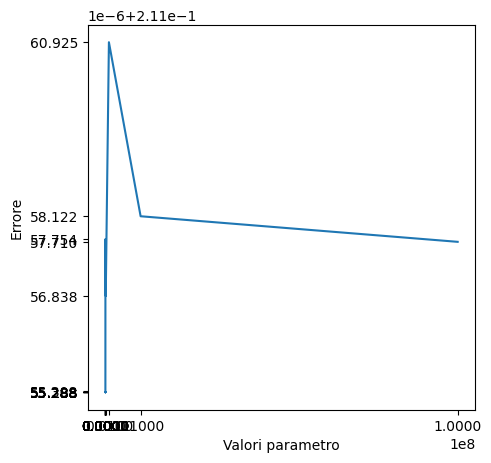

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(param_tuning[1:18],error_WG)
plt.xlabel('Valori parametro')
plt.ylabel('Errore')

plt.xticks(param_tuning[1:18])
plt.yticks(error_WG)